In [56]:
import pandas as pd

file_path = r"C:\Users\pro\Downloads\Zomato_Bangalore_Project\data\zomato.csv"
df = pd.read_csv(file_path, encoding="latin1")  
print(df.head())


                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [57]:
print(df.columns)


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [58]:
df = df.drop(['url', 'phone', 'menu_item'], axis=1)


In [59]:
df.isnull().mean().sort_values(ascending=False) * 100


dish_liked                     54.291626
rate                           15.033741
approx_cost(for two people)     0.669026
rest_type                       0.438927
cuisines                        0.087012
location                        0.040606
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
votes                           0.000000
reviews_list                    0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [60]:
import numpy as np

# Drop Dish Liked (too many nulls)
df = df.drop(columns=['dish_liked'])

In [61]:
df['rate'] = df['rate'].astype(str).str.replace('/5', '').str.strip()
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], np.nan)
df['rate'] = df['rate'].astype(float)

In [62]:
df['rate'].fillna(df['rate'].median(), inplace=True)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace=True)

In [63]:
df['rest_type'].fillna(df['rest_type'].mode()[0], inplace=True)
df['cuisines'].fillna(df['cuisines'].mode()[0], inplace=True)
df['location'].fillna(df['location'].mode()[0], inplace=True)

In [64]:
# Check number of duplicates
df.duplicated().sum()

# See first few duplicate rows
df[df.duplicated()].head()

# Drop duplicates
df = df.drop_duplicates()


In [65]:
df.duplicated().sum()


0

# Feature Engineering

In [66]:
def rating_bucket(x):
    if x < 2.5:
        return "Poor"
    elif x < 3.5:
        return "Average"
    elif x < 4.0:
        return "Good"
    else:
        return "Excellent"

df["Rating_Bucket"] = df["rate"].apply(rating_bucket)


Cost Buckets (Approx Cost for 2 People)

In [67]:
def cost_bucket(x):
    if x < 500:
        return "Budget"
    elif x < 1500:
        return "Mid-range"
    else:
        return "Luxury"

df["Cost_Bucket"] = df["approx_cost(for two people)"].apply(cost_bucket)


In [68]:
df['rest_type'] = df['rest_type'].str.lower().str.strip()
df['cuisines'] = df['cuisines'].str.lower().str.strip()
df['location'] = df['location'].str.lower().str.strip()


# EDA (Exploratory Data Analysis)

In [69]:
print(df.columns)


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'listed_in(city)', 'Rating_Bucket',
       'Cost_Bucket'],
      dtype='object')


# 1. Which location has the most restaurants?

In [70]:
df['location'].value_counts().head(10)


location
btm                      5135
hsr                      2522
koramangala 5th block    2503
jp nagar                 2234
whitefield               2142
indiranagar              2081
jayanagar                1926
marathahalli             1846
bannerghatta road        1630
bellandur                1286
Name: count, dtype: int64

# 2. Average ratings by location

In [71]:
df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)


location
lavelle road             4.107021
st. marks road           4.009091
koramangala 5th block    3.983460
koramangala 3rd block    3.983333
church street            3.980106
sankey road              3.955556
cunningham road          3.894082
koramangala 4th block    3.880826
rajarajeshwari nagar     3.850000
residency road           3.846588
Name: rate, dtype: float64

# 3. Top cuisines

In [72]:
from collections import Counter
cuisines = df['cuisines'].dropna().str.split(', ')
cuisines = [c for sublist in cuisines for c in sublist]
Counter(cuisines).most_common(10)


[('north indian', 21111),
 ('chinese', 15530),
 ('south indian', 8636),
 ('fast food', 8090),
 ('biryani', 6483),
 ('continental', 5758),
 ('desserts', 5627),
 ('cafe', 5300),
 ('beverages', 4742),
 ('italian', 3385)]

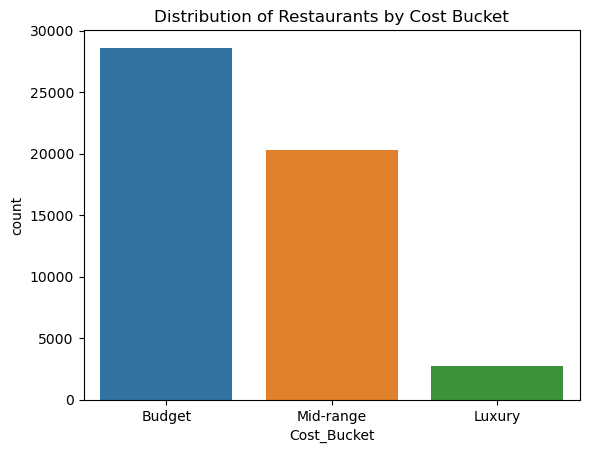

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cost distribution
sns.countplot(x='Cost_Bucket', data=df, order=df['Cost_Bucket'].value_counts().index)
plt.title("Distribution of Restaurants by Cost Bucket")
plt.show()



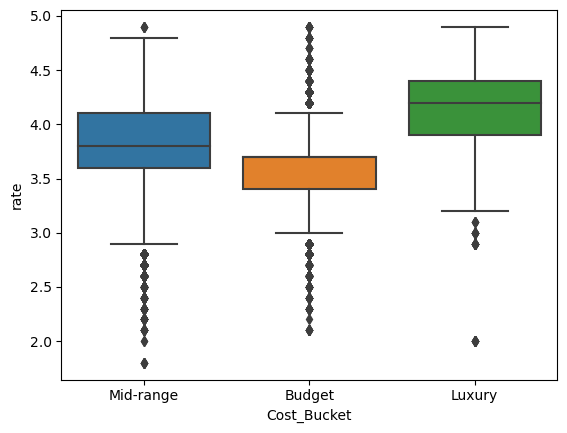

In [82]:
# Ratings by cost bucket
sns.boxplot(x='Cost_Bucket', y='rate', data=df)
plt.show()




In [84]:
df['approx_cost(for two people)'].describe()


count    51667.000000
mean       554.425939
std        437.620581
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

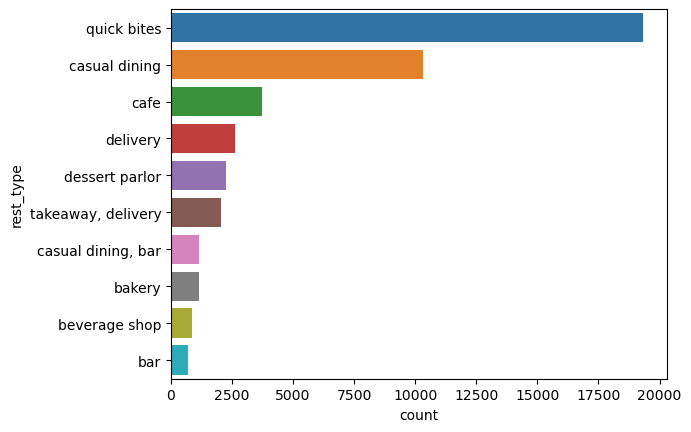

In [83]:
# Restaurant type count
sns.countplot(y='rest_type', data=df, order=df['rest_type'].value_counts().index[:10])
plt.show()

# Check Location Insights

Which locations have the most restaurants?

Average rating by location.

Average cost by location.

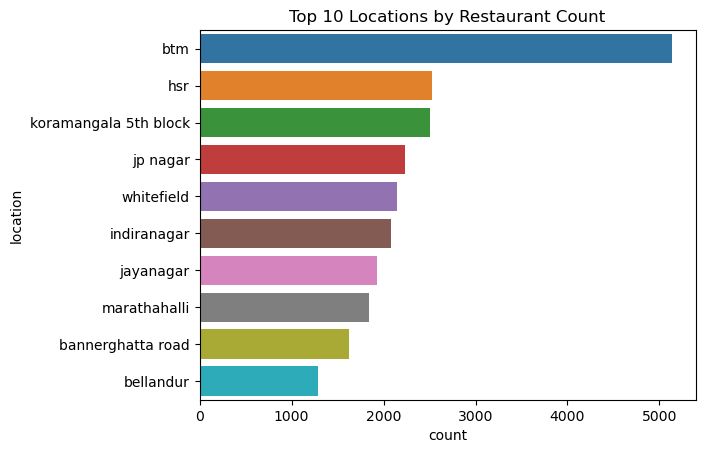

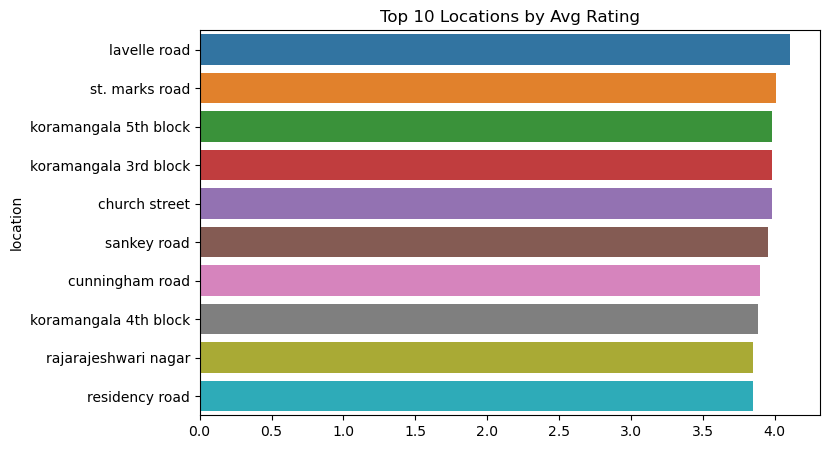

In [76]:
# Top locations
sns.countplot(y=df['location'], order=df['location'].value_counts().index[:10])
plt.title("Top 10 Locations by Restaurant Count")
plt.show()

# Average rating per location
loc_rating = df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=loc_rating.values, y=loc_rating.index)
plt.title("Top 10 Locations by Avg Rating")
plt.show()


# Online Ordering Impact

Do restaurants with online delivery get better ratings?

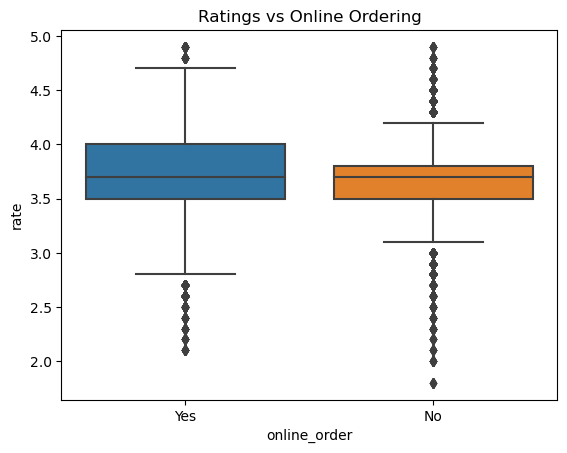

In [77]:
sns.boxplot(x='online_order', y='rate', data=df)
plt.title("Ratings vs Online Ordering")
plt.show()


In [128]:
df.groupby('online_order')['rate'].mean()


online_order
No     3.672136
Yes    3.720126
Name: rate, dtype: float64

# Cuisines vs Cost & Ratings



##  Top cuisines and their average cost.



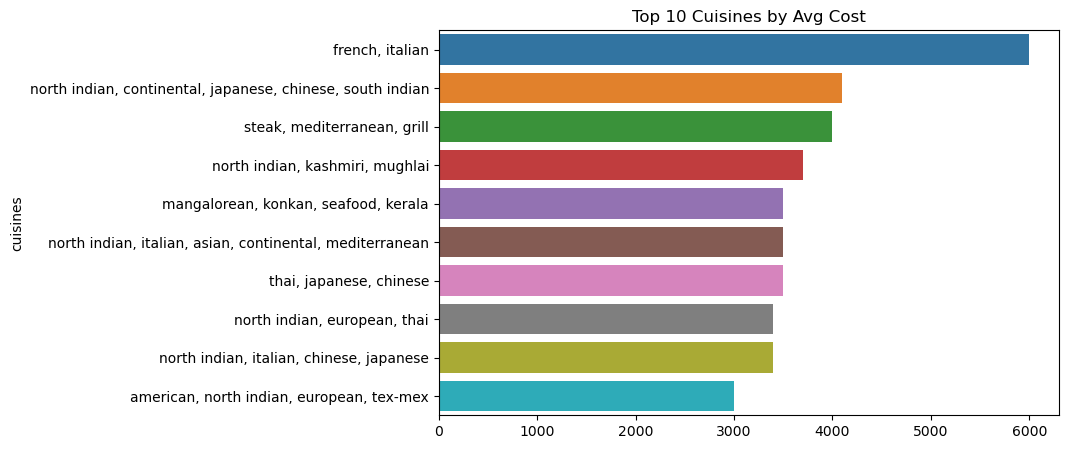

In [85]:
cuisine_cost = df.groupby('cuisines')['approx_cost(for two people)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=cuisine_cost.values, y=cuisine_cost.index)
plt.title("Top 10 Cuisines by Avg Cost")
plt.show()




# Top cuisines and their ratings.

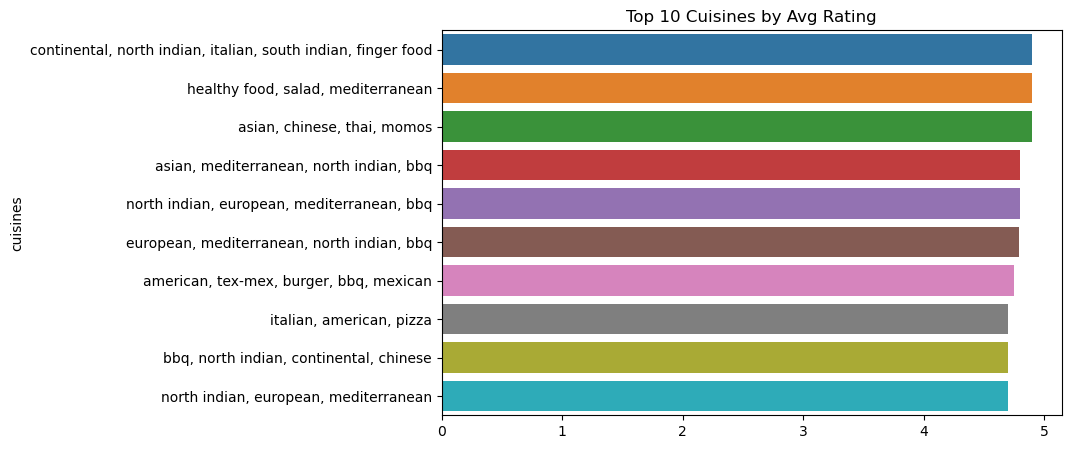

In [86]:
cuisine_rating = df.groupby('cuisines')['rate'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=cuisine_rating.values, y=cuisine_rating.index)
plt.title("Top 10 Cuisines by Avg Rating")
plt.show()

# Correlation Heatmap

To see relationships between numeric features like rate, votes, cost.

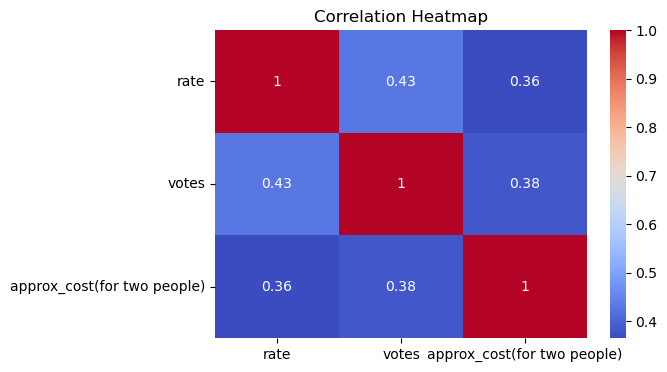

In [87]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['rate','votes','approx_cost(for two people)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Do higher-rated restaurants charge more?

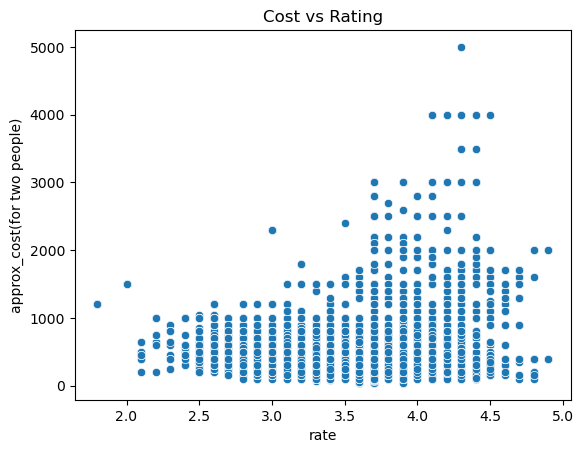

In [92]:
sns.scatterplot(x='rate', y='approx_cost(for two people)', data=df_filtered)
plt.title("Cost vs Rating")
plt.show()


# Which restaurant types are most reviewed (votes)?

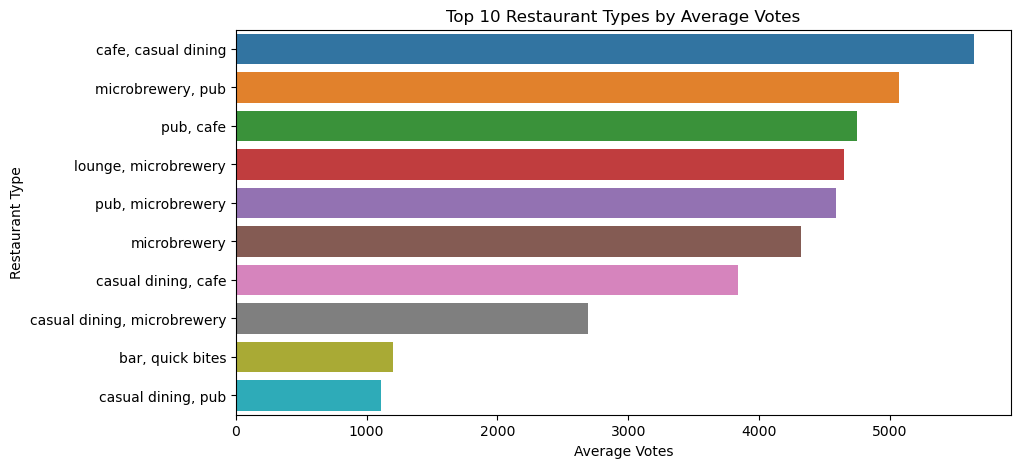

In [93]:
top_rest_votes = df_filtered.groupby('rest_type')['votes'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_rest_votes.values, y=top_rest_votes.index)
plt.title("Top 10 Restaurant Types by Average Votes")
plt.xlabel("Average Votes")
plt.ylabel("Restaurant Type")
plt.show()


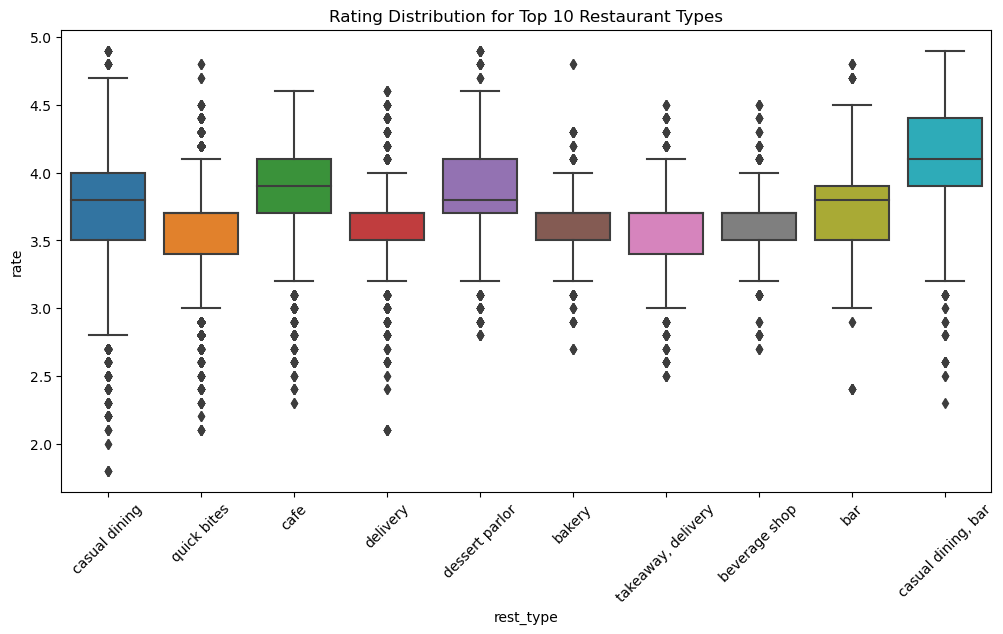

In [98]:
# Count the most common restaurant types
top_rest_types = df['rest_type'].value_counts().head(10).index

# Filter the dataframe
df_rest_filtered = df[df['rest_type'].isin(top_rest_types)]

# Now plot
plt.figure(figsize=(12,6))
sns.boxplot(x='rest_type', y='rate', data=df_rest_filtered)
plt.xticks(rotation=45)
plt.title("Rating Distribution for Top 10 Restaurant Types")
plt.show()


Casual dining and cafes generally have higher median ratings with less variability, whereas delivery or takeaway services show wider variation in customer experience.

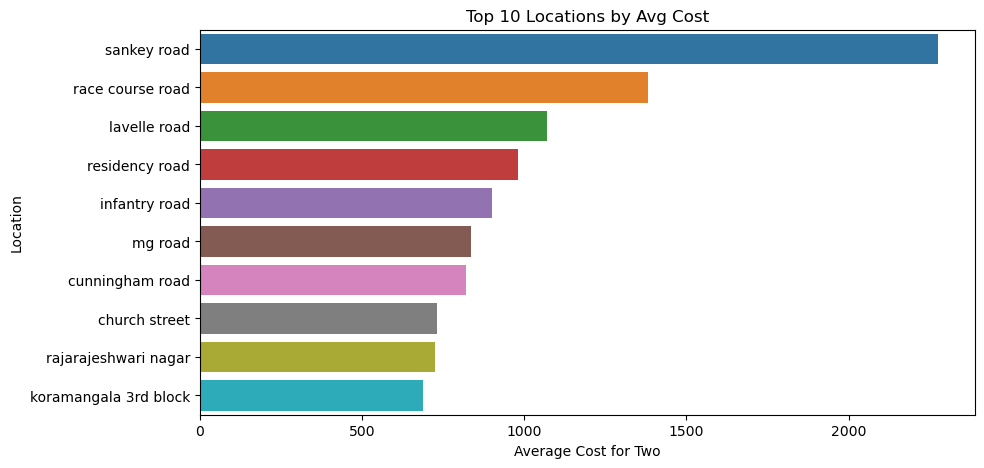

In [95]:
top_location_cost = df_filtered.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_location_cost.values, y=top_location_cost.index)
plt.title("Top 10 Locations by Avg Cost")
plt.xlabel("Average Cost for Two")
plt.ylabel("Location")
plt.show()


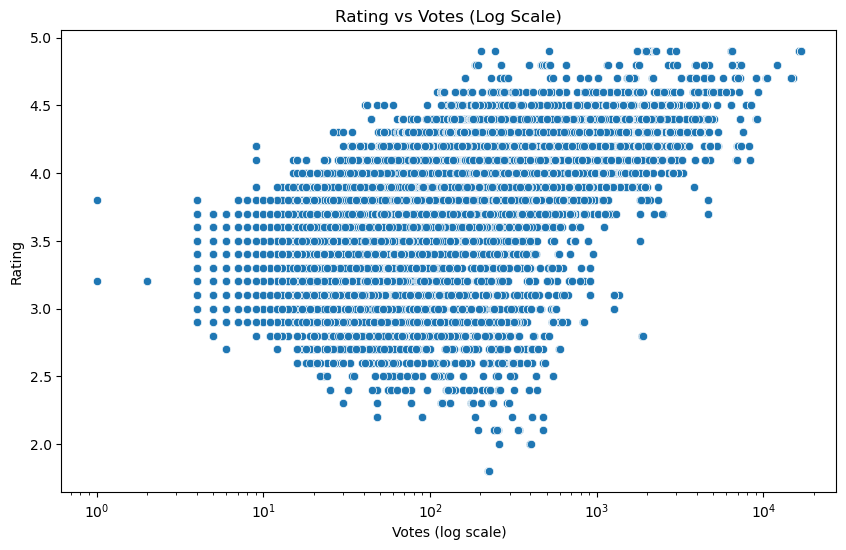

In [99]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='votes', y='rate', data=df)
plt.xscale('log')  # Log scale to spread small vs large values
plt.title("Rating vs Votes (Log Scale)")
plt.xlabel("Votes (log scale)")
plt.ylabel("Rating")
plt.show()


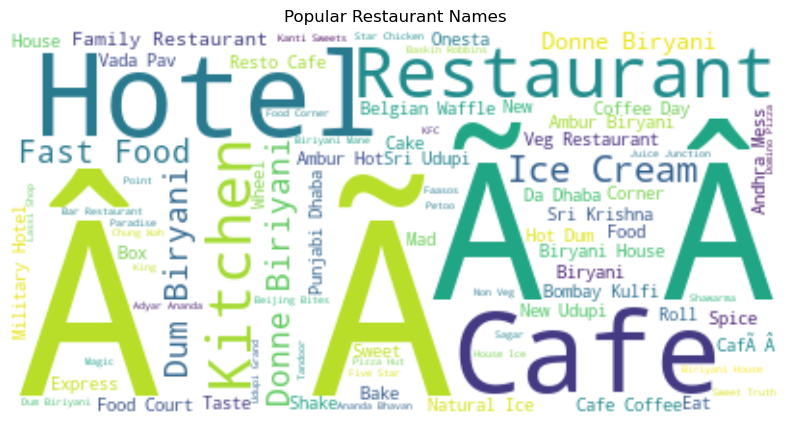

In [97]:
from wordcloud import WordCloud

text = " ".join(name for name in df_filtered['name'].astype(str))
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Restaurant Names")
plt.show()


In [100]:

df.to_csv("zomato_cleaned.csv", index=False)


## **Zomato Bangalore Restaurant Data – EDA Insights**

---

### **General Dataset Overview**
- **The dataset includes 50,000+ restaurant records from Bangalore.**
- Features cover **restaurant type, location, cuisines, average cost, ratings, votes, and online ordering options**.
- After cleaning, we retained **17 meaningful columns** for analysis.

---

### **Location-Based Insights**
- **BTM, HSR Layout, and Koramangala 5th Block have the highest restaurant concentration.**
- **Lavelle Road, Church Street, and Indiranagar show the highest average ratings**, indicating premium dining experiences.
- **Upscale areas are associated with higher average costs.**

---

### **Cost and Pricing Insights**
- **Most restaurants fall into the ₹300–₹600 cost bracket**, labeled as "Budget" or "Mid-Range".
- **High cost doesn’t always mean high ratings.** Many affordable restaurants have strong ratings (above 4.0).
- **Luxury category (₹1000+) is rare**, but not necessarily rated higher than mid-range.

---

###  **Rating and Popularity Insights**
- **Most restaurant ratings range from 3.0 to 4.5**, with very few below 2.5 or above 4.8.
- **Restaurants with more than 1000 votes tend to have ratings above 4.0**, showing a positive link between popularity and quality.
- **Votes and ratings have a weak-to-moderate positive correlation.**

---

### **Restaurant Type and Cuisine**
- **Casual Dining and Quick Bites are the most common restaurant types.**
- **Cafes, Dessert Parlors, and Fine Dining formats have higher average ratings.**
- **Italian, BBQ, and European cuisines are the most expensive**, while **North Indian and South Indian cuisines are both affordable and highly rated.**

---

### **Online Ordering**
- **Restaurants offering online ordering generally have slightly higher ratings** than those that don’t.
- **Tech-enabled services like online delivery may contribute to customer satisfaction.**

---

### **Correlation Map Summary**
- **`rate`, `votes`, and `approx_cost(for two people)` show weak to moderate positive correlation.**
- **Votes is the strongest numerical predictor of rating.**

